In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


In [8]:
orfs = pd.read_csv('data/orfs_cd_paper_dataset.csv').set_index('orf_name')

In [9]:
gene = orfs.loc['YAL063C']

In [56]:
computed_p1_positions = pd.read_csv('data/vit/cell_cycle_24x128_p1/compute_+1_positions.csv').set_index('orf_name')

In [57]:
computed_p1_positions.head()

,chr,p1_position
orf_name,,
YAL063C,1,142
YAL062W,1,29
YAL061W,1,-151
YAL060W,1,129
YAL059W,1,28


In [58]:
from src.vit_img_gen import ViTImgGen

# Partitions lengths of fragments into equal sized (length-wise) patches
# Small fragments: 30-79
# Intermediate fragments: 80-129
# Nucleosomal fragments: 130-200
len_cuts = [45, 90, 140, 201]
window = 1024

# Window = 1024
# Resize = 64   (16 downscale)
# Patch size = 4
# 64 / 4 = 16 column patches
# 1024 / 16 = 64 bps per patch
# 12x64 shaped images
patch_size = 8
sublength_resize_height = patch_size # times 3 vertical patches of height
img_width = 128

vit_gen = ViTImgGen(chrom1_mnase, window, sublength_resize_height, len_cuts,
                    img_width, patch_size, computed_p1_positions=computed_p1_positions)

Loading precomputed +1 nucleosome positions


In [62]:
from src.find_small_plus1 import shift_for_p1

img, scaled_img, smoothed, img_slices, p1 = vit_gen.get_mnase_img(gene)

142


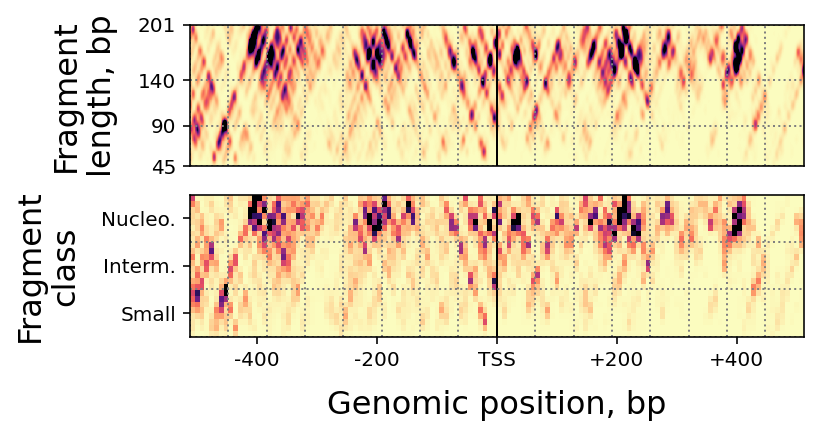

In [63]:
vit_gen.plot_resized_img(vmax=4)